In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
pd.options.display.max_rows = 50
pd.options.display.max_columns = 999
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    df = pd.read_excel("Data/Data_MidTerm_Project_Real_State_Regression.xls")
except:
    df = pd.read_excel("Data/Data_MidTerm_Project_Real_State_Regression.xls")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [3]:
df=df.dropna()
## droping columns
df=df.drop(columns=['id','view','lat','long','sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15'])
## removing duplicates
df=df.drop_duplicates()
## add column total_sqft_building
df['date'] = df['date'].dt.strftime('%Y')
#date changed to dd/mm/year format
df['price'] = df['price'].apply(lambda x: "{:.2f}".format((x/1000)))
df['price'] = df['price'].astype(float)
#changing price values to currency format
df['waterfront'] = df['waterfront'].replace([0, 1],['No', 'Yes']).astype(str)

#transforming waterfront in boolean values
df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,yr_renovated,zipcode,price
0,2014,3,1.00,1180,5650,1.0,No,3,7,1955,0,98178,221.9
1,2014,3,2.25,2570,7242,2.0,No,3,7,1951,1991,98125,538.0
2,2015,2,1.00,770,10000,1.0,No,3,6,1933,0,98028,180.0
3,2014,4,3.00,1960,5000,1.0,No,5,7,1965,0,98136,604.0
4,2015,3,2.00,1680,8080,1.0,No,3,8,1987,0,98074,510.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014,3,2.50,1530,1131,3.0,No,3,8,2009,0,98103,360.0
21593,2015,4,2.50,2310,5813,2.0,No,3,8,2014,0,98146,400.0
21594,2014,2,0.75,1020,1350,2.0,No,3,7,2009,0,98144,402.1
21595,2015,3,2.50,1600,2388,2.0,No,3,8,2004,0,98027,400.0


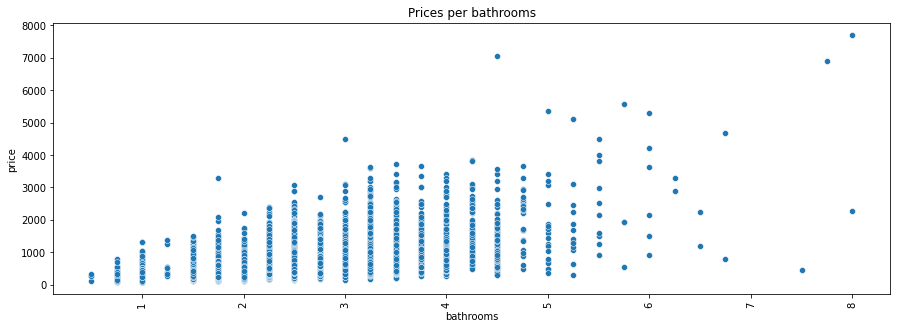

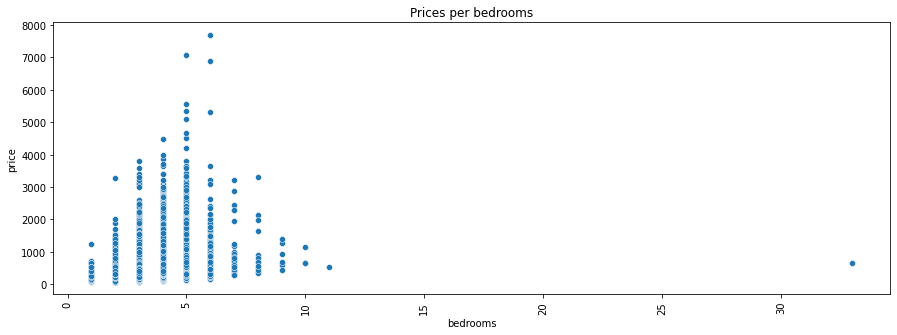

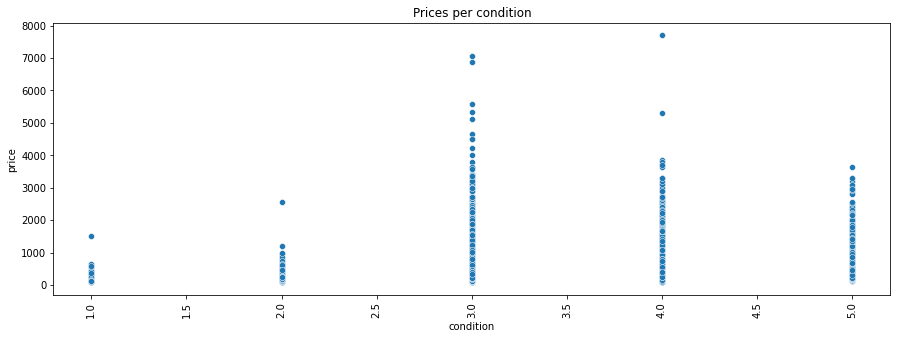

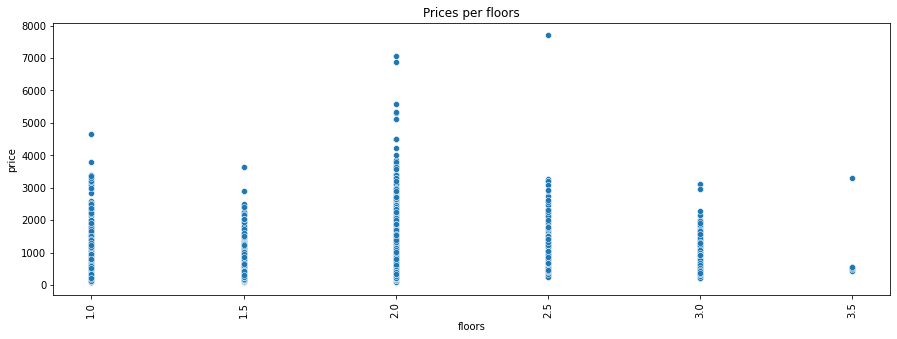

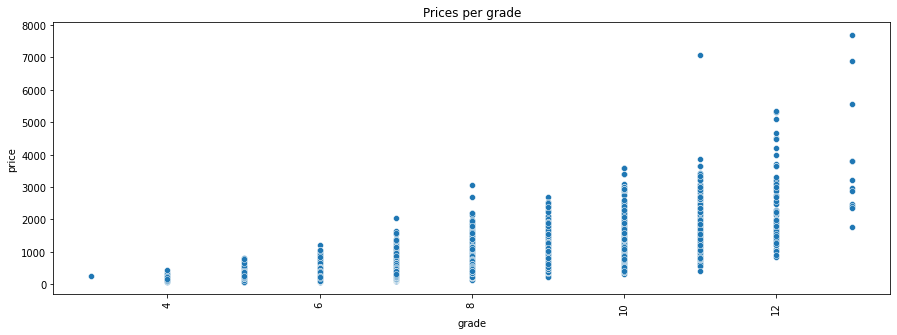

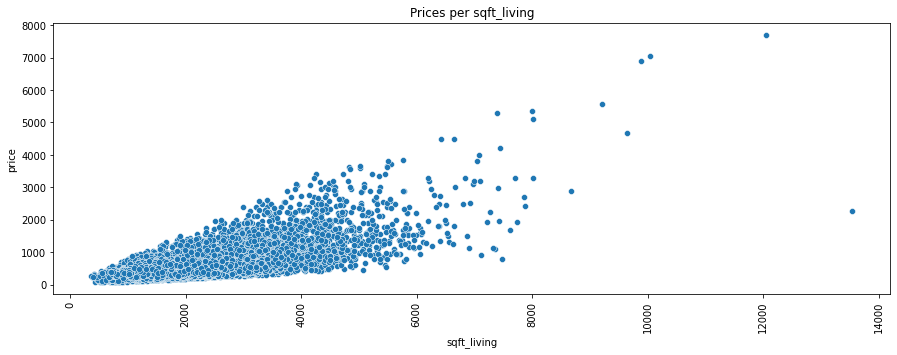

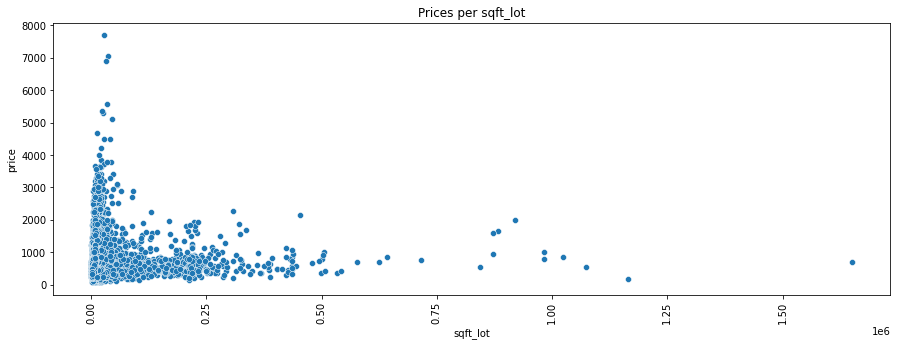

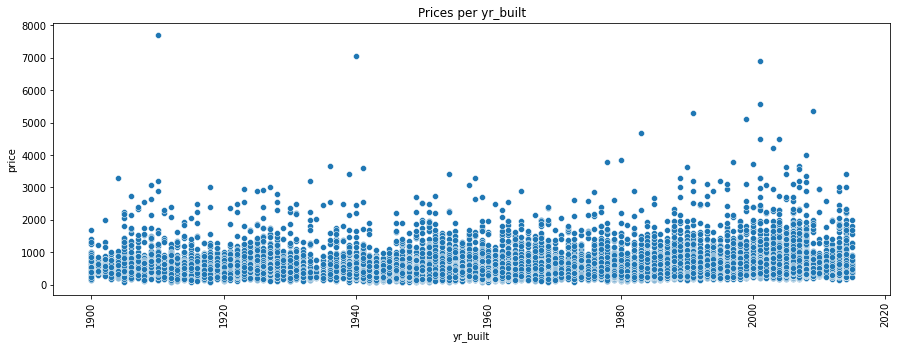

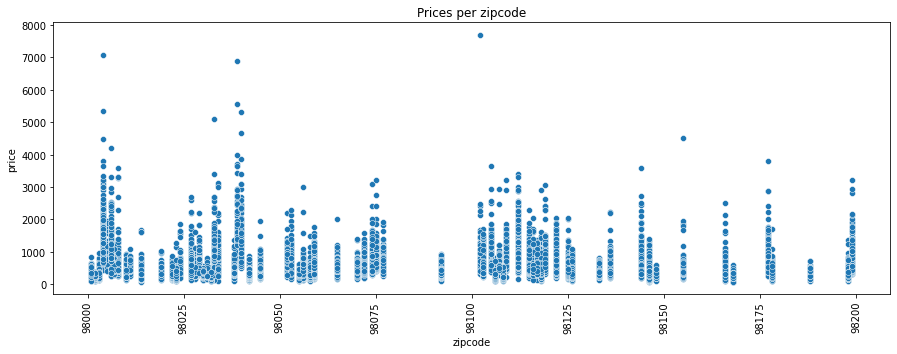

In [9]:
difference = df.columns.difference(['date','waterfront', 'yr_renovated', 'price'])
for x in df[difference]:
    plt.figure(figsize=(15,5))
    sns.scatterplot(y='price', x=df[x], data=df).set(title='Prices per ' + x)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
df.plot(kind='bar', y= 'price', x='waterfront')
df.plot(kind='bar', y= 'price', x='date')
plt.show